# Ribosomal RNA Gene Alignment Pipeline

The aim of this pipeline is to extracted repeating 18s and 28s ribosomal RNA genes seqs of an individual from different datasets and align the genes. \
Step1: Download bam alignments of approximate loci that contains ribosomalRNA genes of one seqrun of a individual \
Step2: 

In [1]:
##Working directory for testrun, 
##for future runs, directory can be organized by individuals

cd /data/judong/Bash_RibosomalRnaGeneAlignment/HG001
mkdir log
mkdir 18S
mkdir 28S

: 1

### Reference document: 
1. Gene areas: Estimated (rough) locuses of ribosomal genes in grch38 \
Path: /data/judong/RibosomalRnaGeneAlignment/Reference/geneareas
Note: the document can be confirmed by redo the Blast

In [4]:
### check the content of estimated ribosomal gene areas in different chromosomes
cat /data/judong/Bash_RibosomalRnaGeneAlignment/Reference/geneareas

chr2:132000000-133000000

chr14:15500000-16500000

chr16:33500000-34500000

chr19:23500000-24500000

chr20:29000000-31000000

chr21:8000000-9500000

chr22:11000000-12000000

chrY:10000000-11000000

chrUn_GL000220v1

chr22_KI270733v1_random

chrUn_KI270442v1


: 1

2. Sequencing data files:
Path1: RibosomalRnaGeneAlignment/Reference/seqDatabase.txt
Note: reference sequences of rRNA gene and PacBio CCS sequencing Data from NCBI, ENA etc as included
Path2:RibosomalRnaGeneAlignment/Reference/sequencing-data
Note:NCBI links of Giab sequencing NCBI samples

In [5]:
### to check the content of the file:
cat /data/judong/Bash_RibosomalRnaGeneAlignment/Reference/seqDatabase.txt

=======================Ribosomal RNA gene fasta===============================================

NCBI Human 18S ribosomal RNA
https://www.ncbi.nlm.nih.gov/nuccore/X03205.1?report=fasta
NCBI Human 28S ribosomal RNA
https://www.ncbi.nlm.nih.gov/nuccore/M11167.1?report=fasta


=====================Complete T2T reconstruction of a human genome CHM13=========================== 
https://github.com/marbl/CHM13


CHM13 T2T v2.0
FTP directory:
https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/914/755/GCA_009914755.4_CHM13_T2T_v2.0/
Fasta file url:
ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/914/755/GCA_009914755.4_CHM13_T2T_v2.0/GCA_009914755.4_CHM13_T2T_v2.0_genomic.fna.gz

CHM13 T2T v1.1
FTP directory:
ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/914/755/GCA_009914755.3_CHM13_T2T_v1.1/
Fasta file url:
ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/914/755/GCA_009914755.3_CHM13_T2T_v1.1/GCA_009914755.3_CHM13_T2T_v1.1_genomic.fna.gz


=========================================ENA PacBio seque

: 1

# Download sequences

Grch38 Bam file \
• sequencing-data file contains links to sequencing runs from different individuals. \
  They are aligned against grch38 reference genome \
◦ The sequencing runs are renamed as seqrun1, seqrun2 .. and so on \
• The script download-aligmap.sh downloads the bam file of wanted sequencing run \
◦ Only those regions of a bam file were downloaded that contained ribosomal genes \
▪ Saved to a file reference/grch38-geneareas \
◦ Bam files are saved to files hg00*/grch38-aligmap/seqrun*.(region).bam \
◦ The script also saves the read depths to seqrun*.region.depth

### Argument 1: bam urls from seqDatabase.txt
### Argument 2: sequencing_runs name: seqrun1 etc
### Test URL: PacBio_CCS_15kb_20kb_chemistry2

url :  ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG002_NA24385_son/PacBio_CCS_15kb_20kb_chemistry2/GRCh38/HG002.SequelII.merged_15kb_20kb.GRCh38.duplomap.bam" 

ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG003_NA24149_father/PacBio_CCS_15kb_20kb_chemistry2/GRCh38/HG003.SequelII.merged_15kb_20kb.pbmm2.GRCh38.haplotag.10x.bam

ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG001_NA24143_mother/PacBio_CCS_15kb_20kb_chemistry2/GRCh38/HG001.SequelII.merged_15kb_20kb.pbmm2.GRCh38.haplotag.10x.bam

ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/NA12878/PacBio_CCS_15kb_20kb_chemistry2/GRCh38/GIAB_5mC_CpG/HG001.GRCh38.deepvariant.haplotagged.bam
more details in reference/seqDatabase.txt
run : "seqrun1"`


In [2]:
### Genome position of Chromosomes has shown as control
### Bash example: bash /data/judong/ribosome-rna/download-aligmap.sh Argument1 Argument2
bash /data/judong/ribosome-rna/download-aligmap.sh ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/NA12878/PacBio_CCS_15kb_20kb_chemistry2/GRCh38/GIAB_5mC_CpG/HG001.GRCh38.deepvariant.haplotagged.bam seqrun1

chr22_KI270733v1_randoml
chrUn_KI270442v1
chrUn_GL000220v1
chr22:11000000-12000000
chr19:23500000-24500000
chrY:10000000-11000000
chr21:8000000-9500000
chr16:33500000-34500000
chr20:29000000-31000000
chr14:15500000-16500000
chr2:132000000-133000000


: 1

# Remap-ribosome-reads-chm13
### LogPath:RobosomalRnaGeneAlignment/Testrun/Log

• Locations of the ribosomal genes are imprecise in Grch38 genome \
◦ Only a few ribosomal genes and they are mislocated. \
→ Realign them to chm13 reference genome which assembled from Pacbio CCS long read sequences \
• Script remap-ribosome-reads-chm13.sh deassemables ribosomal genes containing reads from grch38 bam files and realigns them against chm13 reference genome \
◦ Reads were saved to hg00*/grch38-aligmap/reads-seqrun*.fq. \
◦ Reads were realigned using minimap2 software with parameters found from NCBI: https://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/NA12878/PacBio_SequelII_CCS_11kb/ README.txt
   
◦ The scrip creates a new bam in which only ribosomal genes containing reads are aligned against chm13 ▪ Saved to hg00*/chm13-aligmap/seqrun*.bam
• The script writes also read depths for each chromosomes: hg00*/chm13-aligmap/seqrun*.chr*.depth

### Reference Genome:
CHM13 T2T v1.1 is copied from local file \
Another option would be download from 
ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/914/755/GCA_009914755.3_CHM13_T2T_v1.1/GCA_009914755.3_CHM13_T2T_v1.1_genomic.fna.gz for different versions

### Arguments:
#### Update: add new viriable Reference as the the second viriable of remap codes
Argument 1: run (example: seqrun1)
Argument 2: reference (example: chm13.draft_v1.1.fasta more details in reference/seqDatabase.txt )

In [1]:
### working directory Test_run
cd /data/judong/Bash_RibosomalRnaGeneAlignment/HG001

: 1

In [2]:
bash /data/judong/Bash_RibosomalRnaGeneAlignment/Codes/remapToLongReadSeqRef.sh seqrun1 /data/judong/Bash_RibosomalRnaGeneAlignment/Reference/chm13.draft_v1.1.fasta 2> log/remapLog.txt

chrM004l
chr21
chr22
chr20
chr19
chr17
chr18
chr16
chr14
chr15
chr13
chr10
chr12
chr9
chr11
chr8
chr7
chrX
chr6
chr5
chr3
chr4
chr2
chr1


: 1

# !!!Change Kernel to gnuplot then run the following comand to check the depth!!!

#### Note1: In this part of the pipline the depth of each mapped alingment can be compared with chm13 18s and 28s reference by editing the sample chromosome name and the reference ones 
#### Note2: The chromosome should contain rRNA genes 

### Test with Chromosome 22

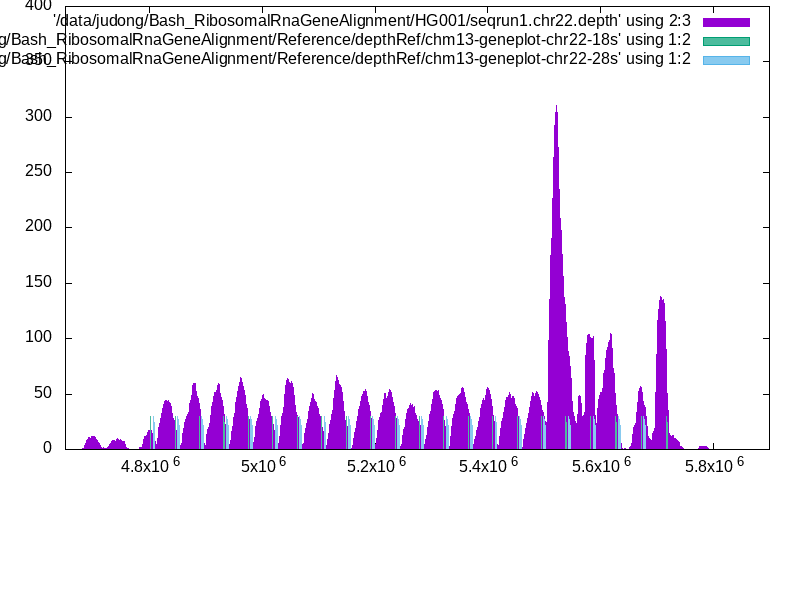

set term png size 800,600 

Terminal type is now 'png'
Options are 'nocrop enhanced size 800,600 font "arial,12.0" '


In [1]:
### graph size
set term png size 800,600 
### margin ratio
set bmargin at screen 0.25
set tmargin at screen 0.99
### axis range
set yrange [0:400]
set xrange [4.65e6:5.9e6]
### plot commande
plot '/data/judong/Bash_RibosomalRnaGeneAlignment/HG001/seqrun1.chr22.depth' using 2:3 with filledcurves y=0,'/data/judong/Bash_RibosomalRnaGeneAlignment/Reference/depthRef/chm13-geneplot-chr22-18s' using 1:2 with filledcurves y=0 fillstyle transparent solid 0.7, '/data/judong/Bash_RibosomalRnaGeneAlignment/Reference/depthRef/chm13-geneplot-chr22-28s' using 1:2 with filledcurves y=0 fillstyle transparent solid 0.7 


### Test with chromosome 13

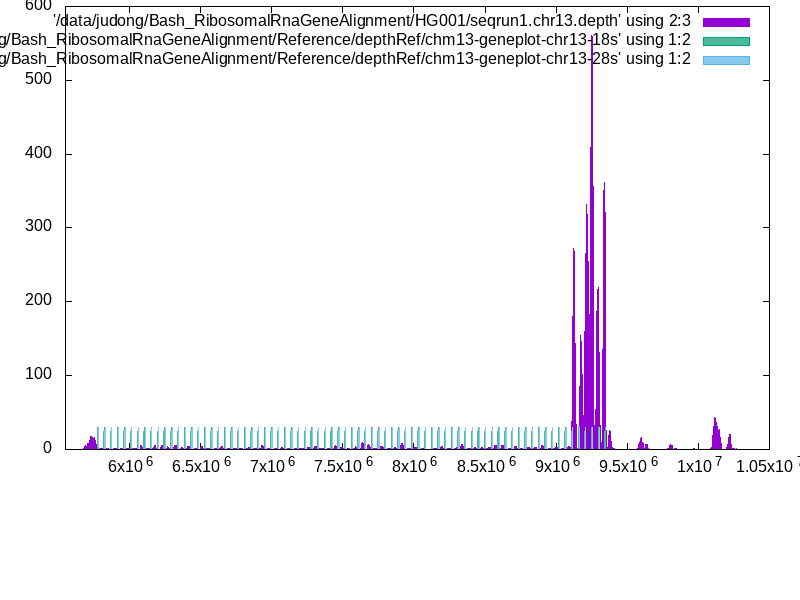

set term png size 800,600 

Terminal type is now 'png'
Options are 'nocrop enhanced size 800,600 font "arial,12.0" '


In [2]:
set term png size 800,600 
set bmargin at screen 0.25
set tmargin at screen 0.99
set yrange [0:600]
set xrange [5.55e6:10.5e6]
plot '/data/judong/Bash_RibosomalRnaGeneAlignment/HG001/seqrun1.chr13.depth' using 2:3 with filledcurves y=0,'/data/judong/Bash_RibosomalRnaGeneAlignment/Reference/depthRef/chm13-geneplot-chr13-18s' using 1:2 with filledcurves y=0 fillstyle transparent solid 0.7, '/data/judong/Bash_RibosomalRnaGeneAlignment/Reference/depthRef/chm13-geneplot-chr13-28s' using 1:2 with filledcurves y=0 fillstyle transparent solid 0.7 


## !!!Back to Bash Kernel!!!

# Disassembling reads from a chm13 bam file 
### Logpath:RibosomalRnaGeneAlignment/Test_Run/Log
• The script extract-ribosome-reads-softclipped.sh disassembles ribosomal genes containing reads from the chm13 bamfile and cleaves softclipped reagions from each end \
◦ Reads are saved to files based on a gene: \
▪ \<individual>/18S/reads-seqrun*.fq \
▪ \<individual>/28S/read-seqrun*fq \
▪ If a read contains both genes, it is saved to both files \
▪ If a gene is on the minus strand, a reverse complement of a gene is saved

In [3]:
### working directory test_Run
cd /data/judong/Bash_RibosomalRnaGeneAlignment/HG001

: 1

In [4]:
### Argument Seqrun1
### stdout and stderror to disassembelLog.txt
bash /data/judong/Bash_RibosomalRnaGeneAlignment/Codes/extract-ribosome-reads-softclipped.sh seqrun1 2> log/disassembelLog.txt


: 1

# Gene isolation from reads
### Logpath:RibosomalRnaGeneAlignment/Test_Run/Log
• The script geneIsolation.sh isolates the ribosomal genes from reads \
◦ Reads are aligned to a ribosomal gene sequence \
◦ → min-query-overlap=0.1  \
◦ Reads are cut where the gene starts and stops \
◦ Isolated genes were checked by aligning them against the gene sequence with more strict threshold

## NOTE: 
1. In this step 18S and 28S ribosomal genes Should be analyzed seperately
2. Pagan is not installed in terminal. So zipped file was downloaded to home folder with:wget http://wasabiapp.org/download/pagan/pagan2.linux64.20190829.tgz  then the pagan folder including bin/pagan2 was copied to 18s and 28s folder


#### Arguments:
1. reference: 18S or 28S ribosomal gene seq
path1:/data/judong/RibosomalRnaGeneAlignment/Reference/18S_ncbi.fas
path2:/data/judong/RibosomalRnaGeneAlignment/Reference/28S_ncbi.fas
2. seqrun: seqrun*

In [5]:
cp -r /data/judong/Bash_RibosomalRnaGeneAlignment/HG002/18S/pagan /data/judong/Bash_RibosomalRnaGeneAlignment/HG001/18S/
cp -r /data/judong/Bash_RibosomalRnaGeneAlignment/HG002/28S/pagan /data/judong/Bash_RibosomalRnaGeneAlignment/HG001/28S/

: 1

# Need rerun 18s

In [3]:
# working Directory for 18S
# .../\<individual>/18S
cd /data/judong/Bash_RibosomalRnaGeneAlignment/HG001/18S

: 1

In [4]:
bash /data/judong/Bash_RibosomalRnaGeneAlignment/Codes/geneIsolation.sh /data/judong/Bash_RibosomalRnaGeneAlignment/Reference/18S_ncbi.fas seqrun1 2>/data/judong/Bash_RibosomalRnaGeneAlignment/HG001/log/18SgeneisolationLog.txt 

: 1

In [1]:
# working Directory for 28S
# .../\<individual>/28S
cd /data/judong/Bash_RibosomalRnaGeneAlignment/HG001/28S

: 1

In [2]:
bash /data/judong/Bash_RibosomalRnaGeneAlignment/Codes/geneIsolation.sh /data/judong/Bash_RibosomalRnaGeneAlignment/Reference/28S_ncbi.fas seqrun1 2>/data/judong/Bash_RibosomalRnaGeneAlignment/HG001/log/28SgeneisolationLog.txt 

: 1

# Gene alignments against each other
### Logpath:RibosomalRnaGeneAlignment/Test_Run/Log
• Script align-cut-mafft.sh aligns genes against each other. The alignment is saved to file \
• hg00*/(gene)/genes-seqrun*.fas-aligned-cut.fas

### Arguments:
1.Reference: 
18S path:"/data/judong/RibosomalRnaGeneAlignment/Reference/18S_ncbi.fas"
28S path:"/data/judong/RibosomalRnaGeneAlignment/Reference/18S_ncbi.fas"
2.Filename: genes-seqrun*.fas

In [5]:
# working Directory for 18S
# .../\<individual>/18S
cd /data/judong/Bash_RibosomalRnaGeneAlignment/HG001/18S

: 1

In [6]:
bash /data/judong/Bash_RibosomalRnaGeneAlignment/Codes/mafftAlignment.sh /data/judong/Bash_RibosomalRnaGeneAlignment/Reference/18S_ncbi.fas genes-seqrun1.fas 2>../log/mafftAlignmentLog18S.txt

2:43644l


: 1

In [7]:
# working Directory for 28S
# .../\<individual>/28S
cd /data/judong/Bash_RibosomalRnaGeneAlignment/HG001/28S

: 1

In [8]:
bash /data/judong/Bash_RibosomalRnaGeneAlignment/Codes/mafftAlignment.sh /data/judong/Bash_RibosomalRnaGeneAlignment/Reference/28S_ncbi.fas genes-seqrun1.fas 2>../log/mafftAlignmentLog28S.txt

3:14709l


: 1

# Product Folder
#### Path: RibosomalRnaGeneAlignment/AlignmentResults
The final alignment product: gene-seqrun*.fas-aligned-cut.fas has been manually copied to product path with addition of indvidualname and gene name

# Check the Products